<a href="https://colab.research.google.com/github/yunuserbas/Scraping/blob/main/2_Crawling_multiple_pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
pages = []

for i in range(1, 6):
    url = 'http://www.chucknorrisfacts.fr/facts/top/' + str(i)
    pages.append(url)

items_container =[]
items_jokes =[]
items_rating =[]

for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')
    items_container.append(soup.find_all("div", {"class", "card"}))
    items_jokes.append(soup.find_all(class_= "card-text"))
    items_rating.append(soup.find_all("span"))

joke_rating ={}
for value in items_container:
  for i in range(len(value)):
    joke_rating[value[i].p.text] = value[i].span.text

In [3]:
from pandas.io.parsers.readers import is_index_col
import pandas as pd

df = pd.DataFrame(joke_rating.items(), columns=['Jokes', 'Rating_Result'])
df

,Jokes,Rating_Result
0,Les ennemis des amis de Chuck Norris sont ses ...,(8.93/10)
1,,(8.43/10)
2,"Un jour Chuck Norris a eu un zero en latin, de...",(8.43/10)
3,Chuck Norris ne sait pas à quoi ressemble Nico...,(8.42/10)
4,L'avenir se demande parfois ce que Chuck Norri...,(8.42/10)
...,...,...
95,Chuck Norris a déjà battu la montre dans une c...,(8.22/10)
96,"Si Chuck Norris n'utilise pas l'Oreal, c'est p...",(8.22/10)
97,Chuck Norris cueille les cerises avec la queue...,(8.22/10)
98,Chuck Norris peut mettre un headshot au cavali...,(8.22/10)


In [24]:
import re


df["Score"] = df['Rating_Result'].apply(lambda x: re.search('\d{1}.\d{2}', x).group(0))
df

,Jokes,Rating_Result,Score
0,Les ennemis des amis de Chuck Norris sont ses ...,(8.93/10),8.93
1,,(8.43/10),8.43
2,"Un jour Chuck Norris a eu un zero en latin, de...",(8.43/10),8.43
3,Chuck Norris ne sait pas à quoi ressemble Nico...,(8.42/10),8.42
4,L'avenir se demande parfois ce que Chuck Norri...,(8.42/10),8.42
...,...,...,...
95,Chuck Norris a déjà battu la montre dans une c...,(8.22/10),8.22
96,"Si Chuck Norris n'utilise pas l'Oreal, c'est p...",(8.22/10),8.22
97,Chuck Norris cueille les cerises avec la queue...,(8.22/10),8.22
98,Chuck Norris peut mettre un headshot au cavali...,(8.22/10),8.22


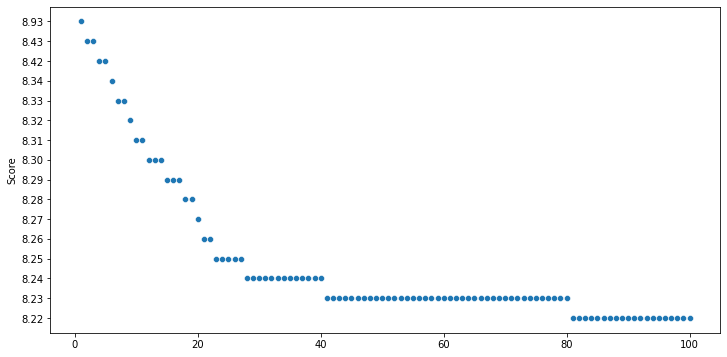

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (12,6))

jokes =[]
for i in range(1, 101):
  jokes.append(i)


sns.scatterplot(data = df, x= jokes, y='Score')
plt.show()